In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### TASK : Exploratory Data Analysis (EDA)
Load Prepared Data:
Load the cleaned and integrated data from Component 1 into Python.


Visualize Data:
Use libraries such as Matplotlib and Seaborn to create visualizations that reveal booking trends, seasonal patterns, and high-demand classes.


Statistical Analysis:
Perform descriptive statistics to summarize data features (e.g., mean, median, standard deviation).
Identify outliers and anomalies using statistical tests or visual methods like box plots.

##### Load Prepared Data:
Load the cleaned and integrated data from Component 1 into Python.

In [7]:
df = pd.read_csv(r"C:\\Users\\Asus\\Desktop\\monu_merged_dataset.xlsx.csv", index_col='Unnamed: 0')
print(df) 

     ActivitySiteID      ActivityDescription  \
0               HXP  20-20-20  2.45pm-3.45pm   
1               HXP  20-20-20  2.45pm-3.45pm   
2               HXP  20-20-20  2.45pm-3.45pm   
3               HXP  20-20-20  2.45pm-3.45pm   
4               HXP  20-20-20  2.45pm-3.45pm   
...             ...                      ...   
1107            TSC       Zumba  6.30-7.30pm   
1108            TSC       Zumba  6.30-7.30pm   
1109            TSC            Zumba - 6-7pm   
1110            TSC            Zumba - 6-7pm   
1111            TSC            Zumba - 6-7pm   

     BookingEndDateTime (Month / Day / Year) BookingStartTime  MaxBookees  \
0                                  08-Apr-18         14:45:00          25   
1                                  15-Apr-18         14:45:00          25   
2                                  22-Apr-18         14:45:00          25   
3                                  29-Apr-18         14:45:00          25   
4                                  06-

In [8]:
df.head()

,ActivitySiteID,ActivityDescription,BookingEndDateTime (Month / Day / Year),BookingStartTime,MaxBookees,Number Booked,Price (INR)
0,HXP,20-20-20 2.45pm-3.45pm,08-Apr-18,14:45:00,25,12,499.0
1,HXP,20-20-20 2.45pm-3.45pm,15-Apr-18,14:45:00,25,15,499.0
2,HXP,20-20-20 2.45pm-3.45pm,22-Apr-18,14:45:00,25,14,499.0
3,HXP,20-20-20 2.45pm-3.45pm,29-Apr-18,14:45:00,25,9,499.0
4,HXP,20-20-20 2.45pm-3.45pm,06-May-18,14:45:00,25,7,499.0


In [9]:
# drop unnecessary columns
df.drop(['ActivityDescription', 'MaxBookees', 'BookingStartTime'], axis=1, inplace=True)

In [10]:
# encoding ActivitySiteID

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['ActivitySiteID'] = le.fit_transform(df['ActivitySiteID'])

In [15]:
df['BookingEndDateTime (Month / Day / Year)'] = pd.to_datetime(df['BookingEndDateTime (Month / Day / Year)'])

In [27]:
df.head()

,Unnamed: 0,ActivitySiteID,BookingEndDateTime (Month / Day / Year),Number Booked,Price (INR)
0,0,1,08-Apr-18,12,499.0
1,1,1,15-Apr-18,15,499.0
2,2,1,22-Apr-18,14,499.0
3,3,1,29-Apr-18,9,499.0
4,4,1,06-May-18,7,499.0


#### Visualize Data:
Use libraries such as Matplotlib and Seaborn to create visualizations that reveal booking trends, seasonal patterns, and high-demand classes.

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


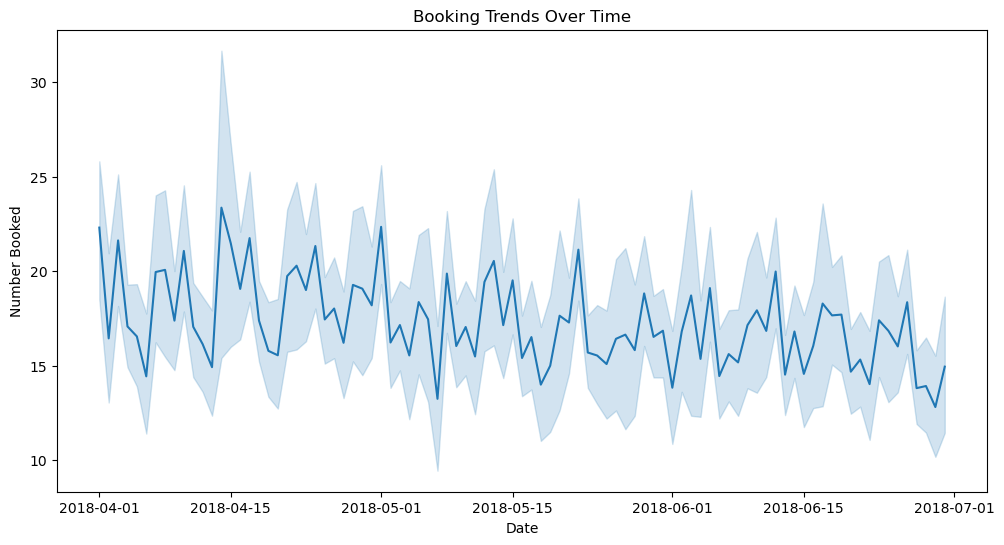

In [16]:
# Plotting the number of bookings over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='BookingEndDateTime', y='Number Booked')
plt.title('Booking Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number Booked')
plt.show()

#### Statistical Analysis:
Perform descriptive statistics to summarize data features (e.g., mean, median, standard deviation).
Identify outliers and anomalies using statistical tests or visual methods like box plots.

In [17]:
df.describe()

,ActivitySiteID,BookingEndDateTime (Month / Day / Year),Number Booked,Price (INR),BookingEndDateTime
count,3289.000000,3289,3289.000000,3271.000000,3289
mean,1.868653,2018-05-16 08:58:57.610215680,17.088781,1852.714460,2018-05-16 08:58:57.610215680
min,0.000000,2018-04-01 00:00:00,1.000000,499.000000,2018-04-01 00:00:00
25%,1.000000,2018-04-24 00:00:00,10.000000,1299.000000,2018-04-24 00:00:00
50%,2.000000,2018-05-16 00:00:00,16.000000,1499.000000,2018-05-16 00:00:00
75%,3.000000,2018-06-08 00:00:00,24.000000,2499.000000,2018-06-08 00:00:00
max,4.000000,2018-06-30 00:00:00,64.000000,3999.000000,2018-06-30 00:00:00
std,1.403556,NaN,9.504098,792.636673,NaN


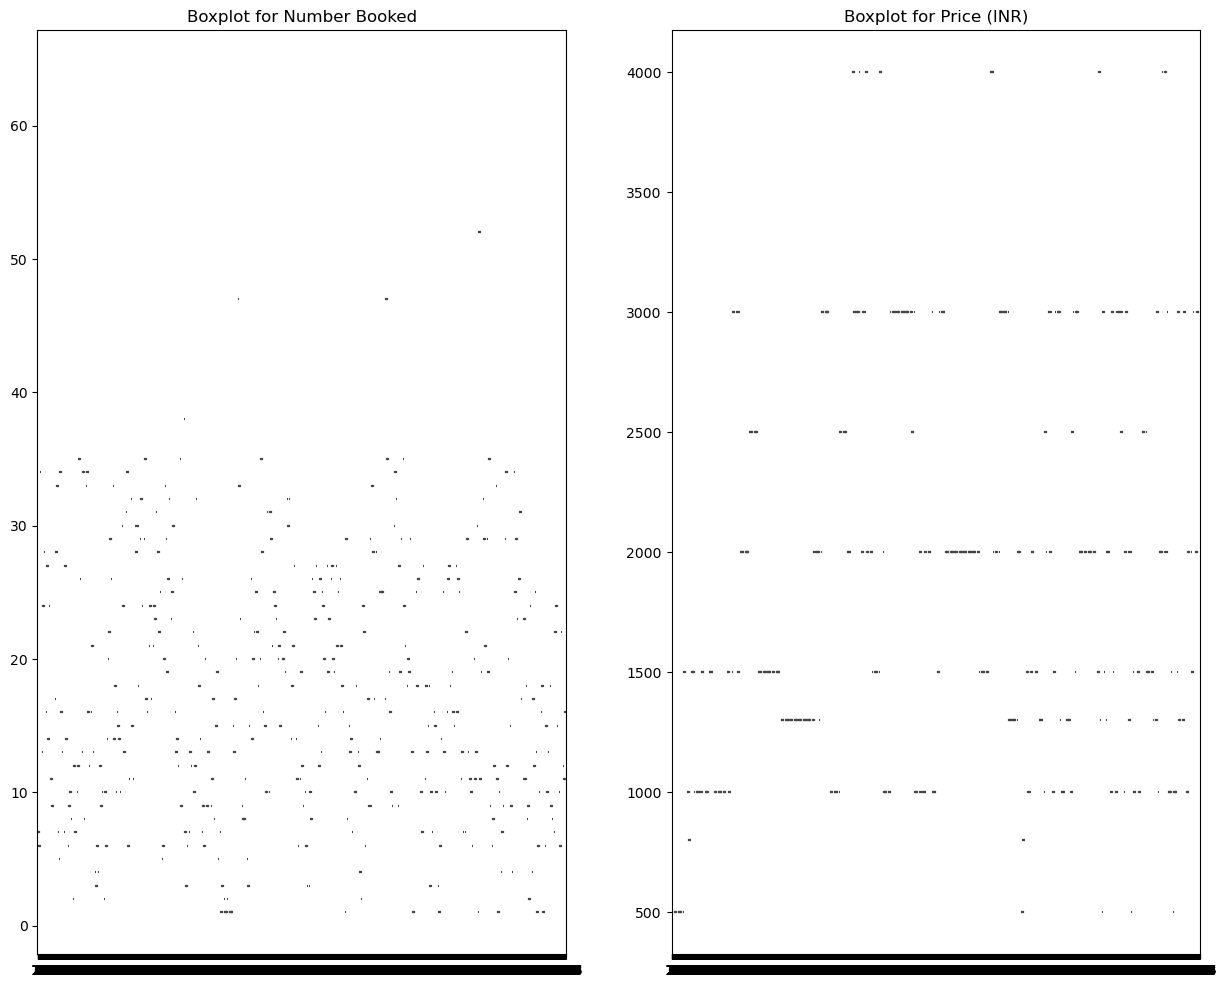

In [19]:
plt.figure(figsize=(15,12))
num_columns = ['Number Booked', 'Price (INR)']
for i, col in enumerate(num_columns, 1):
    plt.subplot(1,2,i)
    sns.boxplot(df[col])
    plt.title(f'Boxplot for {col}')

In [20]:
Q1 = df['Number Booked'].quantile(0.25)
Q3 = df['Number Booked'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
df = df[(df['Number Booked'] > lower_bound) & (df['Number Booked'] < upper_bound)]

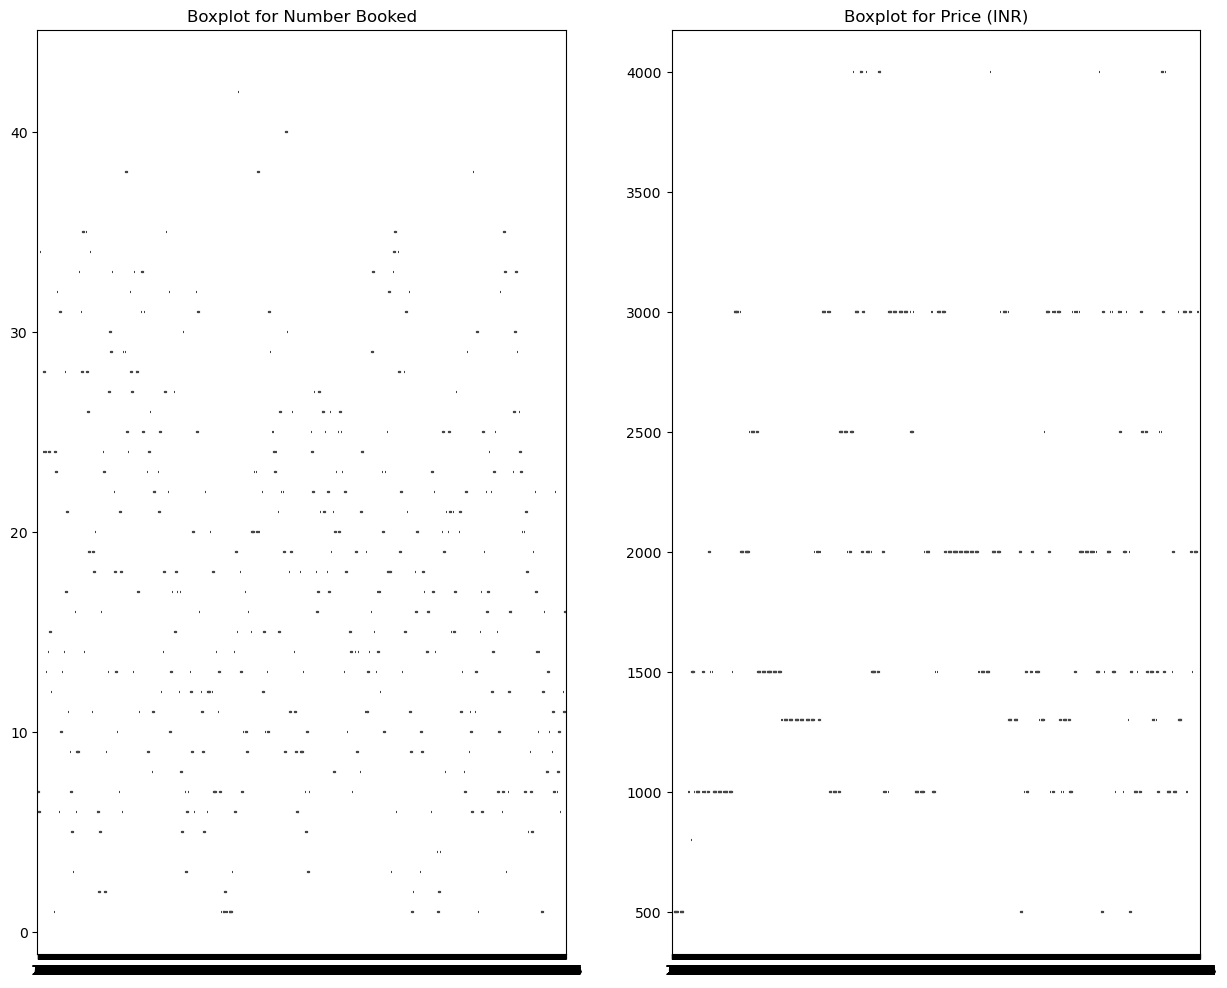

In [21]:
plt.figure(figsize=(15,12))
num_columns = ['Number Booked', 'Price (INR)']
for i, col in enumerate(num_columns, 1):
    plt.subplot(1,2,i)
    sns.boxplot(df[col])
    plt.title(f'Boxplot for {col}')

In [22]:
df.to_csv('Monu_final_df.csv')